# Task 2- Decision Tree Algorithm(The Sparks Foundation)

# Submitted By: Km. Rashi

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("E:/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Here, We see that id column has no significance so we have to drop it

In [5]:
data.drop(['Id'],axis=1,inplace=True)

In [6]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
data['Species'].value_counts('Normalize=1')

Iris-versicolor    0.333333
Iris-virginica     0.333333
Iris-setosa        0.333333
Name: Species, dtype: float64

In [12]:
x=data.iloc[:,:-1]
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y=data.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)

Splitting data into train test split

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.20, random_state=101)

In [17]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5, criterion= 'gini')
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [20]:
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
confusion_matrix(Y_test,Y_test_pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]], dtype=int64)

In [23]:
confusion_matrix(Y_train,Y_train_pred)

array([[40,  0,  0],
       [ 0, 38,  0],
       [ 0,  0, 42]], dtype=int64)

In [24]:
accuracy_score(Y_test,Y_test_pred)

0.9666666666666667

Here accuracy is 96.67% means decision tree is good fit for data

Text(0.5, 1.0, 'Decision Tree')

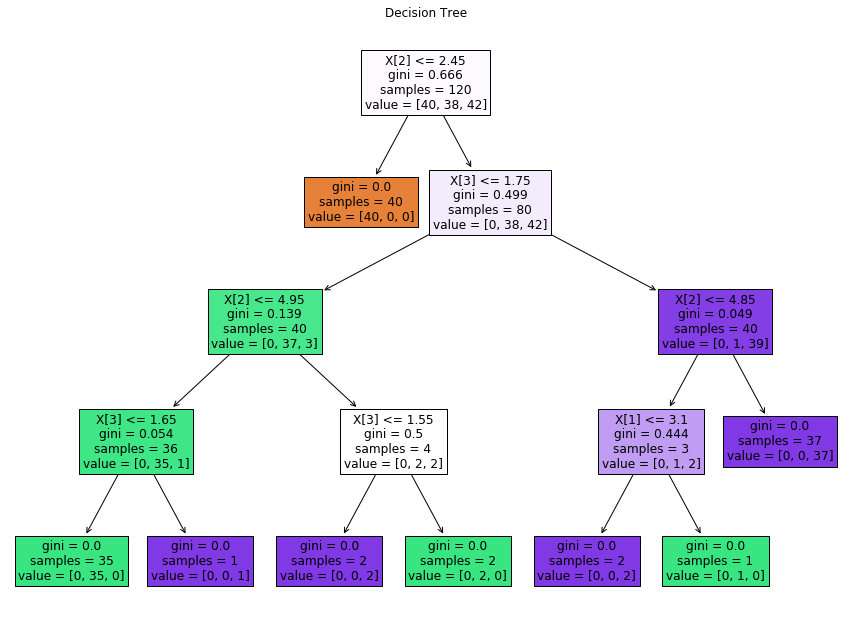

In [25]:
from sklearn import tree
plt.figure(figsize=(15,11))
tree.plot_tree(model,filled=True)
plt.title("Decision Tree")
